In [126]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as tf
import random

tf.disable_v2_behavior()
print("Num GPUs Available: ", tf.test.is_built_with_cuda())

path="./data"
IMG_SIZE=100

Num GPUs Available:  True


In [127]:
dog_files=os.listdir(path+'/dogs')
wolf_files=os.listdir(path+'/wolves')
image_paths = []
#label: 0 for dog ,1 for wolf # woof -woof
labels=[]
img=[]
for file in dog_files:
    image = cv2.imread(path+'/'+'dogs/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
    #Creating and saving each image in the form of numerical data in an array
    img.append(norm_image.flatten())
    labels.append([1,0])
    image_paths.append(path+'/'+'dogs/'+file)
for file in wolf_files:
    image = cv2.imread(path+'/'+'wolves/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
          #Creating and saving each image in the form of numerical data in an array
    image_paths.append(path+'/'+'wolves/'+file)

    img.append(norm_image.flatten())
    labels.append([0,1])

[0, 1]


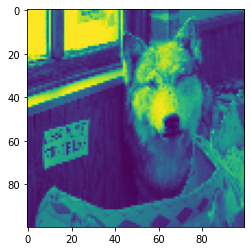

In [128]:
df={'data':img,'label':labels}
df=pd.DataFrame(df)
df = df.sample(frac=1).reset_index(drop=True)

plt.imshow(df.data[0].reshape(IMG_SIZE,IMG_SIZE))
print(df.label[1])
#main_train_df,test_df=train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
#train_df,val_df=train_test_split(main_train_df, test_size=0.1,shuffle=True,random_state=42)
#random.shuffle(df)
train_df=df[:1400]
val_df=df[1400:1600]
test_df=df[1600:]


In [129]:
x_train=list(train_df.data)
y_train=list(train_df.label)
x_val=list(val_df.data)
y_val=list(val_df.label)
x_test=list(test_df.data)
y_test=list(test_df.label)


In [ ]:
(hidden1_size, hidden2_size) = (1000, 500)
x =tf.placeholder(tf.float32,[None,IMG_SIZE*IMG_SIZE])
y_ = tf.placeholder(tf.float32,[None,2])
W1 = tf.Variable(tf.truncated_normal([IMG_SIZE*IMG_SIZE, hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden1_size]))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[hidden2_size]))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)
W3 = tf.Variable(tf.truncated_normal([hidden2_size, 2], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[2]))

In [ ]:

pred =tf.matmul(z2, W3) + b3
#loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(pred), reduction_indices=[1]))
loss1=tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=pred)
loss = tf.reduce_mean(loss1)
train_step = tf.train.GradientDescentOptimizer(0.0000001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
train_loss=[]
test_loss=[]
train_acc=[]
test_acc=[]

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,1000):
    if i%100==0 and i!=0:
        tr_loss,tr_acc=sess.run([loss,accuracy], feed_dict={x:x_train,y_:y_train})
        te_loss,te_acc=sess.run([loss,accuracy], feed_dict={x:x_val,y_:y_val})
        train_loss.append(tr_loss)
        train_acc.append(tr_acc)
        test_loss.append(te_loss)
        test_acc.append(te_acc)
        print(loss.eval(session= sess, feed_dict = {x:x_train,y_:y_train}))
        #train_acc = sess.run(accuracy, feed_dict={x:x_train,y_:y_train})
        print (" Training accuracy: %.10f" % (tr_acc))
        #val_acc = sess.run(accuracy, feed_dict={x:x_val,y_:y_val})
        print (" Validation accuracy: %.10f" % te_acc)
    sess.run([train_step],feed_dict={x:x_train,y_:y_train})

In [118]:
train_acc

[]

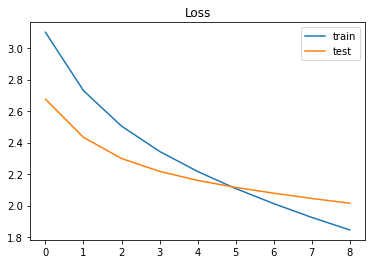

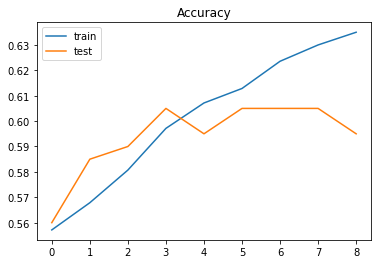

In [125]:
# print(alphas)
plt.plot(train_loss)
plt.plot(test_loss)
plt.title("Loss")
plt.legend(['train','test'])
# plt.xlabel(index)
plt.show()
plt.plot(train_acc)
plt.plot(test_acc)
plt.title("Accuracy")
plt.legend(['train','test'])
# plt.xlabel(index)
plt.show()

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

model = tf.estimator.Estimator(model_fn=model_fn,
                               params={"learning_rate": 1e-4},
                               model_dir="./model5/")

count = 0
while (count < 100000):
    model.train(input_fn=train_input_fn, steps=1000)
    result = model.evaluate(input_fn=val_input_fn)
    print(result)
    print("Classification accuracy: {0:.2%}".format(result["accuracy"]))
    sys.stdout.flush()
    count = count + 1